In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [28]:
# download.file("https://raw.githubusercontent.com/An-Dao/dsci_project/main/data/healthcare_dataset%202.csv","data/healthcare_data_read.csv")
health_data <- read_csv("data/healthcare_data_read.csv")

# Define age ranges
age_ranges <- c(0, 20, 30, 40, 50, 60, 70, 80, Inf)
age_labels <- c("0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81+")

condition_levels <- c("Aspirin","Lipitor","Ibuprofen","Paracetamol","Penicillin")

gender_condition_levels <- c("Male","Female")

medical_condition_levels <- c("Asthma", "Obesity", "Arthritis", "Diabetes", "Cancer", "Hypertension")

blood_condition_levels <- c("A+" ,"A-" ,"B+" , "B-", "AB+", "AB-", "O+", "O-")

compress_health_data <- health_data |>
  clean_names() |>
  mutate(time_spent = as.numeric(difftime(discharge_date, date_of_admission))) |>
  select(billing_amount, age, insurance_provider, medical_condition, time_spent) |>
  mutate(insurance_provider = as_factor(insurance_provider)) |>
  mutate(medical_condition = factor(medical_condition, levels = medical_condition_levels),
         medical_condition = as.numeric(medical_condition))
compress_health_data

    # blood_type = factor(blood_type, levels = blood_condition_levels),
    # blood_type = as.numeric(blood_type),
      
    # medical_condition = factor(medical_condition, levels = medical_condition_levels),
    # medical_condition = as.numeric(medical_condition),
      
    #  gender = factor(gender, levels = gender_condition_levels),
    # gender = as.numeric(gender),
      

Rows: 10000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Name, Gender, Blood Type, Medical Condition, Doctor, Hospital, In...
dbl   (3): Age, Billing Amount, Room Number
date  (2): Date of Admission, Discharge Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


billing_amount age insurance_provider medical_condition time_spent
1     37490.983      81  Medicare           4                 14        
2     47304.065      35  UnitedHealthcare   1                 14        
3     36874.897      61  Medicare           2                 30        
4     23303.322      49  Medicare           1                  1        
5     18086.344      51  UnitedHealthcare   3                 24        
6     22522.363      41  Aetna              3                  3        
7     39593.436      82  Cigna              6                 24        
8     13546.817      55  Blue Cross         3                 17        
9     24903.037      33  Aetna              4                  5        
10    22788.236      39  Blue Cross         1                  1        
11    40325.071      45  Aetna              5                 28        
12     6185.904      23  Medicare           6                 17        
13     4835.946      85  Aetna              4                 15        
14    13669.378      72  Cigna              4                 16        
15    10342.836      65  Cigna              5                 20        
16    27174.943      32  Aetna              3                  7        
17    17394.994      64  Aetna              4                 19        
18    45213.538      23  Medicare           3                  8        
19     4262.912      66  UnitedHealthcare   2                 10        
20    16609.312      80  Blue Cross         3                 28        
21    32263.622      55  Aetna              3                 30        
22    42610.705      79  Blue Cross         1                 14        
23    16701.347      51  Medicare           2                 23        
24    22331.280      33  UnitedHealthcare   4                 21        
25    41319.500      54  Cigna              1                 29        
26    37766.521      26  UnitedHealthcare   2                 27        
27    35834.357      70  Aetna              2                 17        
28    12680.731      74  Cigna              6                 14        
29    12935.413      56  Aetna              5                 28        
30    18393.422      35  UnitedHealthcare   6                 16        
⋮     ⋮              ⋮   ⋮                  ⋮                 ⋮         
9971   9640.999      35  Cigna              3                 23        
9972  38831.708      56  Blue Cross         4                 17        
9973  27648.105      43  UnitedHealthcare   3                  4        
9974  18614.470      69  Blue Cross         5                 21        
9975  10021.901      32  UnitedHealthcare   2                 22        
9976  20793.031      80  Blue Cross         1                  8        
9977  37726.182      81  Blue Cross         3                 30        
9978  22434.605      84  UnitedHealthcare   5                  5        
9979   4997.580      46  Medicare           3                 23        
9980  14416.635      63  Blue Cross         5                 20        
9981  47369.550      71  Medicare           5                 22        
9982  46629.772      54  UnitedHealthcare   3                 29        
9983  35961.407      78  Blue Cross         2                 18        
9984   1675.089      74  Medicare           2                 14        
9985  37181.841      72  Medicare           4                 15        
9986  27476.722      72  Cigna              6                 12        
9987  15872.814      18  Blue Cross         2                  4        
9988  27920.309      84  Cigna              2                 21        
9989   6532.310      60  UnitedHealthcare   5                 22        
9990  36044.467      47  UnitedHealthcare   3                 23        
9991  48753.129      35  Blue Cross         3                 14        
9992  14426.402      56  UnitedHealthcare   1                  4        
9993   8296.299      37  UnitedHealthcare   6                  6

In [3]:
set.seed(2000)

health_split <- initial_split(compress_health_data, prop = 3/4, strata = insurance_provider)
health_training <- training(health_split)
health_testing <- testing(health_split)

In [4]:
#Using only training data, summarize the data in at least one table (this is exploratory data analysis). 
#An example of a useful table could be one that reports the number of observations in each class, 
#the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


# count_blood_type <- health_training |>
#     group_by(blood_type)|>
#     summarize(count = n())
# count_blood_type 

# count_age_range <- health_training |>
#     group_by(age_range)|>
#     summarize(count = n())
# count_age_range

# count_med_cond <- health_training |>
#     group_by(medical_condition) |>
#     summarize(count = n())
# count_med_cond
# count_medication <- health_training |>
#     group_by(medication) |>
#     summarize(count = n())
# count_medication
# count_billrange <- health_training |>
#     group_by(billing_range) |>
#     summarize(count = n())
# count_billrange

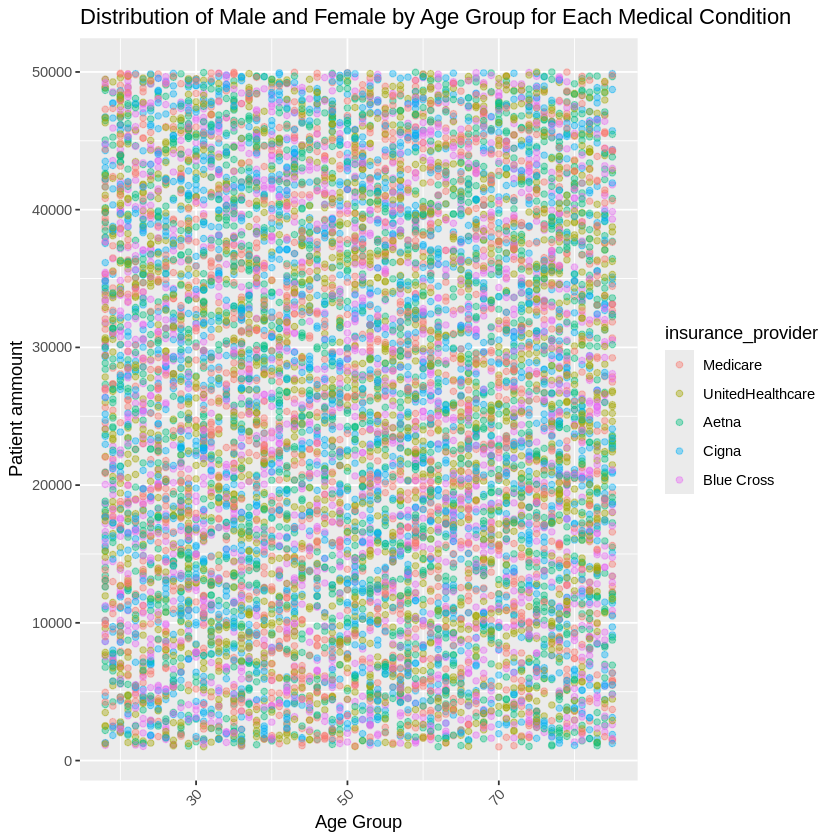

In [10]:

# training_plot <- summary_data |>
#    ggplot(aes(x = age_range, y = count, fill = gender)) + 
#     geom_point(stat = "identity", position = "dodge") +
#   facet_wrap(~ medical_condition, scales = "free") +
#   labs(title = "Distribution of Male and Female by Age Group for Each Medical Condition", x = "Age Group", y = "Patient ammount")+
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))

# training_plot2 <- summary_data |>
#    ggplot(aes(x = blood_type, y = count, fill = gender)) + 
#     geom_bar(stat = "identity", position = "dodge") +
#   facet_wrap(~ medical_condition, scales = "free") +
#   labs(title = "Distribution of Male and Female by Blood type for Each Medical Condition", x = "Blood type", y = "Patient ammount")+
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
# training_plot
# training_plot2


training_plot3 <- compress_health_data |>
   ggplot(aes(x = age, y = billing_amount, colour = insurance_provider)) + 
    geom_point(alpha = 0.4) +
  labs(title = "Distribution of Male and Female by Age Group for Each Medical Condition", x = "Age Group", y = "Patient ammount")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
training_plot3

**Classification Analysis of Patients with Asthma Based on Age, Gender, and BloodType with the Healthcare Dataset**

**Introduction**
<br> Understanding and learning about human health is pivotal in health improvement within society. Healthcare is the system in which improvement of human health is developed through various practices and studies for the prevention and treatment of patients. For our group project, we will be analyzing a dataset found through Kaggle called “Healthcare Dataset”. This dataset includes patient information that simulates real-life healthcare files. Each column provides information about the patient, their date of admission, and services provided based on their condition. Through data classification, the organization and categorizing of new data through past data, we will answer the predictive question of “Will patients be diagnosed with asthma or not based on their age, gender, and blood type?”. We will be using the K-nearest neighbor classification algorithm to analyze our data to get our prediction result. 

**Preliminary Exploratory Data Analysis**
<br> Using our data from the web source https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data, we aren't able to directly use the data in Jupyter Notebook. So before classification, we first need to read it into R by downloading the file and importing it into our repository then we get the directory of the raw file on GitHub. The data is read in and assigned to object "health_data". Although the data table is tidy, many variables are unnecessary for our project. We've shortened the table to age, gender, blood_type, medical_condition, and age_group. Of the age_group column, we will split the data into 8 groups of 0-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81+. Although every other age group is split by 10 years gap we decided to group 0-10 and 11-20 together as they lack amount of data. To split the data into training and testing sets we have picked a random seed of 2000 and split them by 3/4 with 3 parts going to the training set and the remaining for testing. We've grouped and found each variable's amount and concluded that data are fairly evenly distributed for all the groups we did. The main table is the "summary_data" which counts the number of patients that have medical conditions by "age_group", "blood_type" and "gender". We then visualize the "summary_data" into a bar graph showing the distribution of males and females having medical conditions. We can verify the even distribution between male and female patients in all "age_group" for each medical condition. This even spread will allow our model to have a higher precision.

**Methods**
<br> For our data analysis, we will be predicting a medical condition based on the age, gender, and blood type of the patient using "Healthcare Dataset". For this analysis, we will not need every column from the dataset. While the data is already tidy, we will only be using the age, gender, blood_type, medical_condition, and the age_group column. The age_group column will be made by splitting our patients into 8 possible age groups (0-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81+). These are the only variables we will need to predict our medical condition and visualize the results of our prediction. To visualize the results, we will use a bar graph that will show the distribution of male and female patients and their medical conditions. 

**Expected Outcomes and Significance** 
<br> In our data analysis project, we expect to find a correlation between the predictive factors of a patient’s age, gender, and blood type and their likelihood of having asthma. We will also expect to have a model such that when given said predictive factors will predict whether or not a patient will have asthma. Any correlations found could significantly impact healthcare strategies, enabling targeted preventive measures and personalized treatment plans. And the model could further help medical professionals diagnose patients. These discoveries may instigate additional investigations into the underlying reasons behind the observed correlations between asthma risk and specific factors, prompting scientists to develop research questions aimed at unraveling the root causes. This process could unveil systemic issues that contribute to the identified associations, fostering a deeper understanding of the complex interplay between various elements and asthma susceptibility.

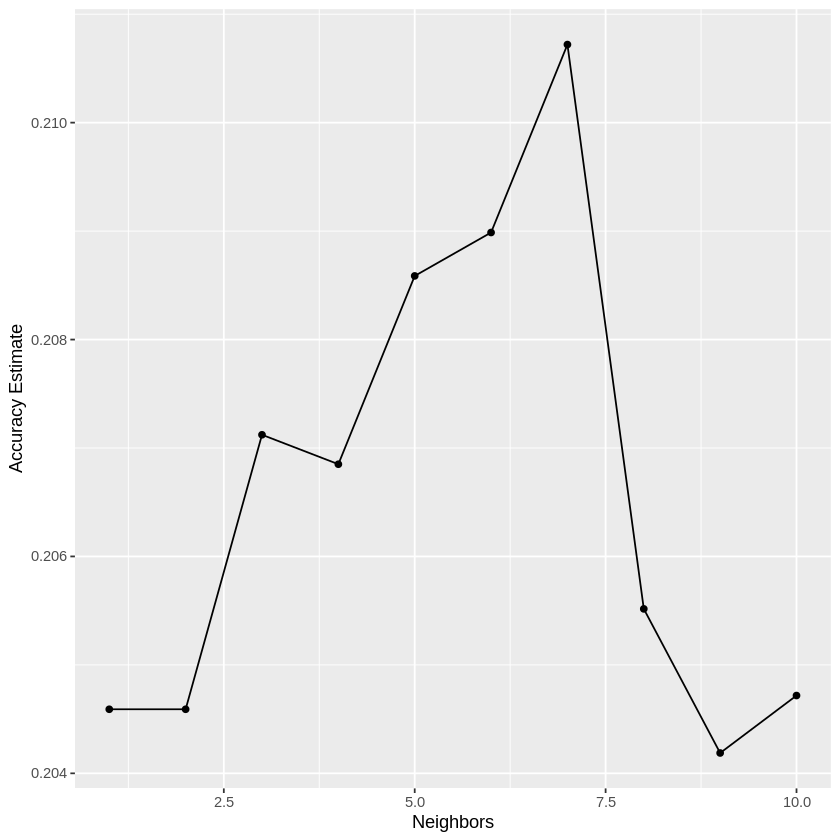

In [6]:
set.seed(2100) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")
recipe <- recipe(insurance_provider ~ ., data = health_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
vfold <- vfold_cv(health_training, v = 5, strata = insurance_provider)
k <- tibble(c(1,2,3,4,5,6,7,8,9,10))
colnames(k) <- "neighbors"
knn_results <- workflow() |>
       add_recipe(recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = vfold, grid = k) |>
       collect_metrics()
#knn_results
accuracies <- knn_results |> 
       filter(.metric == "accuracy")
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")
cross_val_plot





In [7]:

recipe <- recipe(insurance_provider ~ ., data = health_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")
best_fit <- workflow() |>
       add_recipe(recipe) |>
       add_model(best_spec) |>
       fit(data = health_training)
predictions <- predict(best_fit, health_testing) |>
               bind_cols(health_testing)
metrics <- predictions  |>
           metrics(truth = insurance_provider, estimate = .pred_class)
metrics
conf_mat <- predictions  |>
            conf_mat(truth = insurance_provider, estimate = .pred_class)
conf_mat

.metric  .estimator .estimate  
1 accuracy multiclass  0.19064748
2 kap      multiclass -0.01200067

                  Truth
Prediction         Medicare UnitedHealthcare Aetna Cigna Blue Cross
  Medicare               86               90    85    96         89
  UnitedHealthcare       94               95   100   104         97
  Aetna                  97              105   102   110        105
  Cigna                  91              102   108    89        112
  Blue Cross            114              103   112   111        105

In [29]:
point1 <- tibble(29, 33000,)
point <- tibble(29,33000, "UnitedHealthcare", 2, 30)
# Original plot
test_plot <- health_testing %>%
  ggplot(aes(x = age, y = billing_amount, colour = insurance_provider)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age", y = "Billing amount")

# Modify the plot (adding annotations, adjusting size)
test_plot +
  geom_point(size = 2.5) +
  annotate("path", x = point1[1] + 5 * cos(seq(0, 2 * pi, length.out = 100)),
           y = point1[2] + 0.1 * sin(seq(0, 2 * pi, length.out = 100))) +
  annotate("text", x = point1[1], y = point1[2], label = "1", size = 8) +
  theme(text = element_text(size = 20))

ERROR while rich displaying an object: Error in `scale_x_continuous()`:
! Discrete values supplied to continuous scale.
ℹ Example values: 34

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr

**Contributors:**
<br>*An Dao*, *Moya Ku*, Avireet Uppal, Kaelan Zhang